# Курсовое задание на расчёт физических характеристик спектрометра реакторных антинейтрино в пакете Монте-Карло GEANT4


В качестве детектора антинейтрино от ядерного реактора используется сцинтиллятор
на основе линейного алкилбензола (ЛАБ) с сцинтилляционной добавкой PPO (3 г/л) и солью
гадолиния с концентрацией гадолиния в сцинтилляторе 0.5 грамм/литр. Антинейтрино
регистрируются в реакции обратного бета распада антинейтрино на протоне (водороде в
составе ЛАБ). 

Сцинтиллятор объемом 1 м3 размещается в сферическом сосуде из
полиметилметакрилата (ПММА) с толшиной стенок 10 мм. Сфера со сцинтиллятором
расположена в центре цилиндрического бака из нержавеющей стали с внутренними
размерами: диаметр=высоте=1858 мм (толщина стали 2 мм), заполненного линейным
алкилбензолом (ЛАБ) без сцинтилляционных добавок. Внутри бака по вершинам
правильного многоугольника (додекаэдра либо икосаэдра) расположены фотоэлектронные
умножители (ФЭУ) марки Hamamatsu R5912. Световыход сцинтиллятора — 5000
фотонов/МэВ, прозрачность сцинтиллятора 5 метров, прозрачность ЛАБ 12 метров,
квантовая эффективность ФЭУ 28%.

***Конструкция детектора (икосаэдр)***

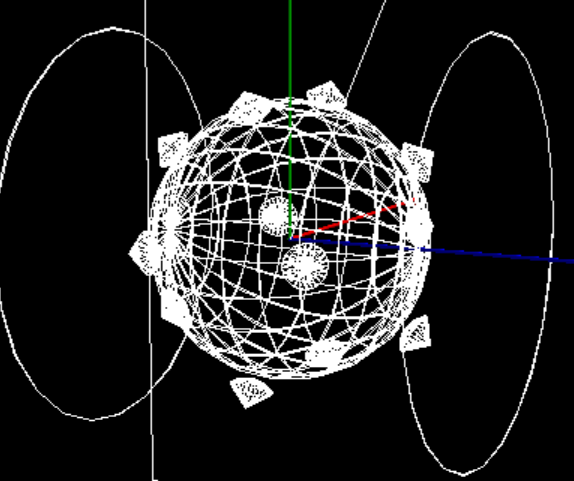
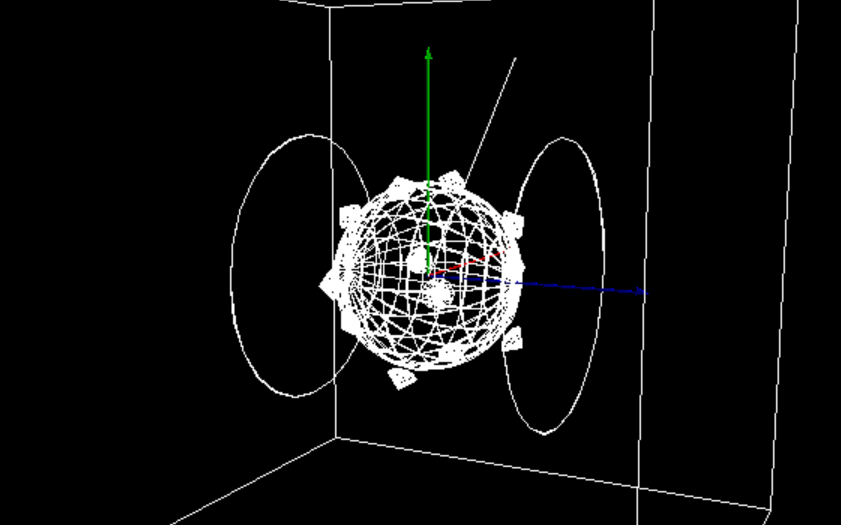

***Конструкция детектора (додекаэдр)***

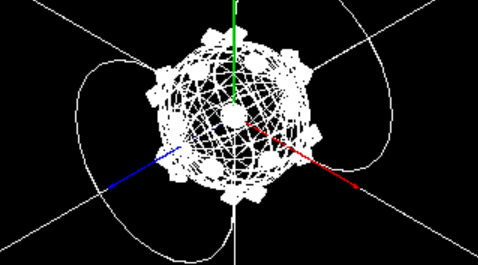

In [2]:
# импорт библиотек для анализа
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Функция отклика детектора (и энергетическое разрешение) электронов с энергией 1 Мэв


Необходимо рассчитать следующие физические характеристики установки для двух
вариантов размещения ФЭУ (в вершинах додекаэдра либо икосаэдра) в пакете Монте-Карло
Geant4:


1 Функцию отклика детектора (и энергетическое разрешение) при регистрации
электронов с энергией 1 Мэв в зависимости от координаты регистрации и функцию отклика
при равномерной регистрации электронов в объеме сцинтиллятора.

***Додекаэдр***

In [14]:
df1 = pd.read_csv('/home/alina_van/project/dodecahedr_e.csv')
df2 = pd.read_csv('/home/alina_van/project/icosahedron_e.csv')


Text(-3.9305555555555554, 0.5, 'frequency')

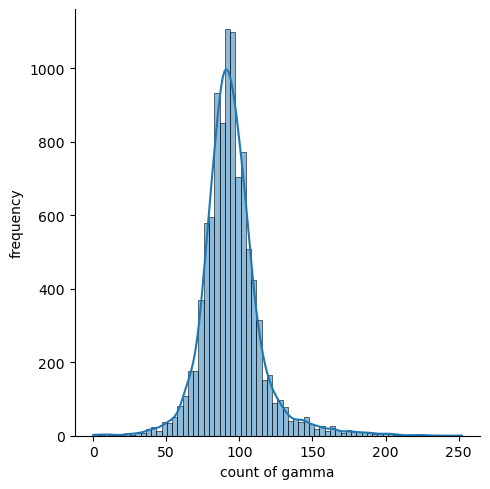

In [9]:
sns.displot(x='count', data =df1, bins=70, kde=True)
plt.xlabel('count of gamma')
plt.ylabel('frequency')

/tmp/ipykernel_557066/1811251122.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfX = df1[['binX', 'count']].groupby('binX').mean().reset_index()
/tmp/ipykernel_557066/1811251122.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfX['std'] = df1[['binX', 'count']].groupby('binX')['count'].std()


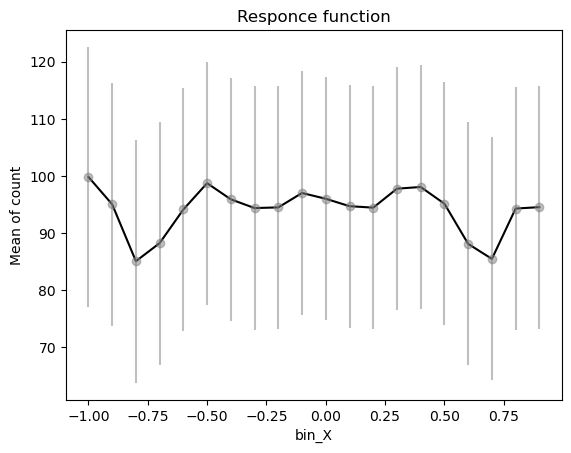

In [19]:
binX = np.arange(-630, 630, 63)
bins = pd.IntervalIndex.from_tuples([(i, i+63) for i in binX])
df1['binX'] = pd.cut(df1.x, bins)
dfX = df1[['binX', 'count']].groupby('binX').mean().reset_index()
dfX['std'] = df1[['binX', 'count']].groupby('binX')['count'].std()
dfX['binX_c'] = np.arange(-1, 1, 2/20)
ax = sns.lineplot(x='binX_c', y='count', data=dfX, color = 'black')
ax.errorbar(x='binX_c', y='count', yerr='std', data=dfX, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_X')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()

/tmp/ipykernel_557066/4289049307.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfY = df1[['binY', 'count']].groupby('binY').mean().reset_index()
/tmp/ipykernel_557066/4289049307.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfY['std'] = df1[['binY', 'count']].groupby('binY')['count'].std()


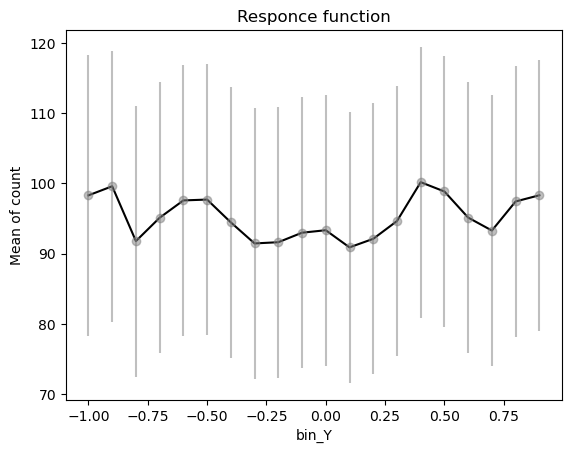

In [20]:
binY = np.arange(-630, 630, 63)
bins = pd.IntervalIndex.from_tuples([(i, i+63) for i in binY])
df1['binY'] = pd.cut(df1.y, bins)
dfY = df1[['binY', 'count']].groupby('binY').mean().reset_index()
dfY['std'] = df1[['binY', 'count']].groupby('binY')['count'].std()
dfY['binY_c'] = np.arange(-1, 1, 2/20)
ax = sns.lineplot(x='binY_c', y='count', data=dfY, color = 'black')
ax.errorbar(x='binY_c', y='count', yerr='std', data=dfY, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_Y')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()

/tmp/ipykernel_557066/602946474.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfz = df1[['binz', 'count']].groupby('binz').mean().reset_index()
/tmp/ipykernel_557066/602946474.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfz['std'] = df1[['binz', 'count']].groupby('binz')['count'].std()


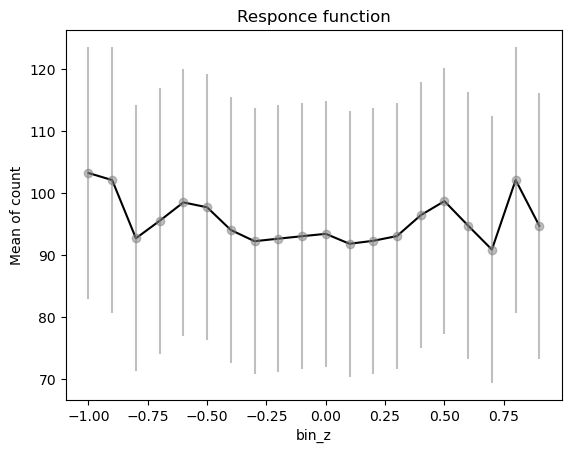

In [21]:
binz = np.arange(-630, 630, 63)
bins = pd.IntervalIndex.from_tuples([(i, i+63) for i in binz])
df1['binz'] = pd.cut(df1.z, bins)
dfz = df1[['binz', 'count']].groupby('binz').mean().reset_index()
dfz['std'] = df1[['binz', 'count']].groupby('binz')['count'].std()
dfz['binz_c'] = np.arange(-1, 1, 2/20)
ax = sns.lineplot(x='binz_c', y='count', data=dfz, color = 'black')
ax.errorbar(x='binz_c', y='count', yerr='std', data=dfz, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_z')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()

***Икосаэдр***

Text(-3.9305555555555554, 0.5, 'frequency')

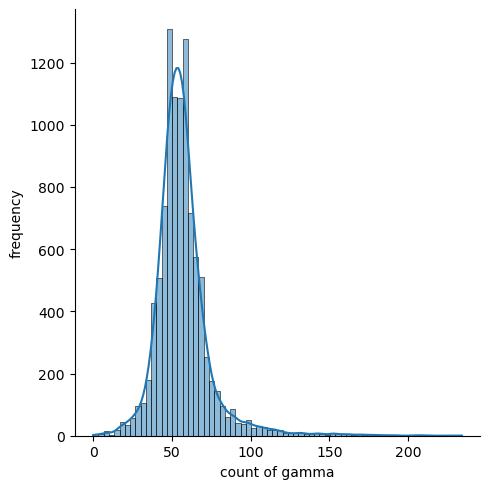

In [15]:
sns.displot(x='count', data =df2, bins=70, kde=True)
plt.xlabel('count of gamma')
plt.ylabel('frequency')

/tmp/ipykernel_557066/3896404034.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfX = df2[['binX', 'count']].groupby('binX').mean().reset_index()
/tmp/ipykernel_557066/3896404034.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfX['std'] = df2[['binX', 'count']].groupby('binX')['count'].std()


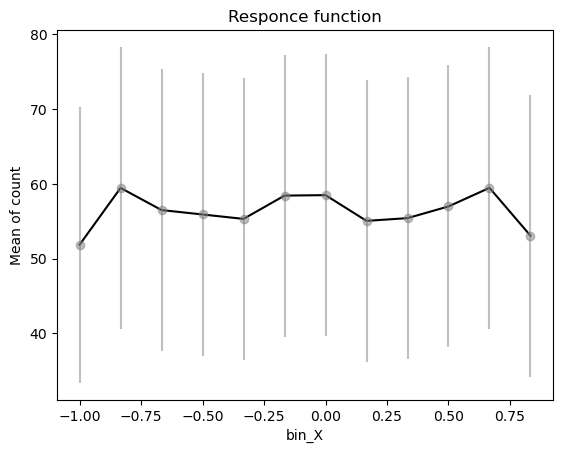

In [16]:
binX = np.arange(-630, 630, 105)
bins = pd.IntervalIndex.from_tuples([(i, i+105) for i in binX])
df2['binX'] = pd.cut(df2.x, bins)
dfX = df2[['binX', 'count']].groupby('binX').mean().reset_index()
dfX['std'] = df2[['binX', 'count']].groupby('binX')['count'].std()
dfX['binX_c'] = np.arange(-1, 1, 2/12)
ax = sns.lineplot(x='binX_c', y='count', data=dfX, color = 'black')
ax.errorbar(x='binX_c', y='count', yerr='std', data=dfX, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_X')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()

/tmp/ipykernel_557066/611826606.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfY = df2[['binY', 'count']].groupby('binY').mean().reset_index()
/tmp/ipykernel_557066/611826606.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfY['std'] = df2[['binY', 'count']].groupby('binY')['count'].std()


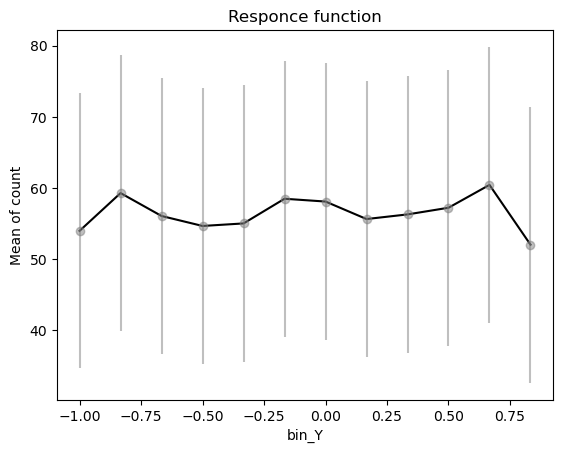

In [17]:
binY = np.arange(-630, 630, 105)
bins = pd.IntervalIndex.from_tuples([(i, i+105) for i in binY])
df2['binY'] = pd.cut(df2.y, bins)
dfY = df2[['binY', 'count']].groupby('binY').mean().reset_index()
dfY['std'] = df2[['binY', 'count']].groupby('binY')['count'].std()
dfY['binY_c'] = np.arange(-1, 1, 2/12)
ax = sns.lineplot(x='binY_c', y='count', data=dfY, color = 'black')
ax.errorbar(x='binY_c', y='count', yerr='std', data=dfY, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_Y')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()

/tmp/ipykernel_557066/954633004.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfz = df2[['binz', 'count']].groupby('binz').mean().reset_index()
/tmp/ipykernel_557066/954633004.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfz['std'] = df2[['binz', 'count']].groupby('binz')['count'].std()


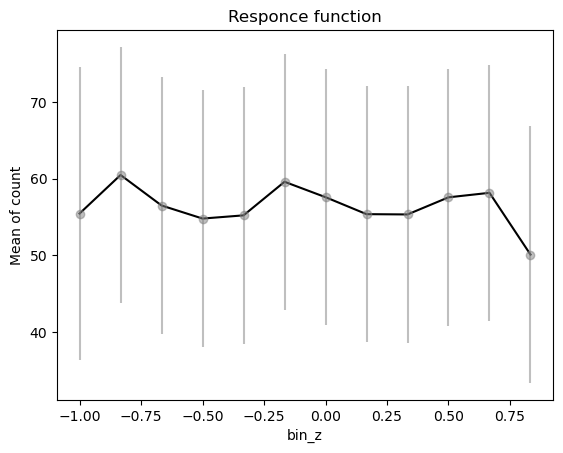

In [23]:
binz = np.arange(-630, 630, 105)
bins = pd.IntervalIndex.from_tuples([(i, i+105) for i in binz])
df2['binz'] = pd.cut(df2.z, bins)
dfz = df2[['binz', 'count']].groupby('binz').mean().reset_index()
dfz['std'] = df2[['binz', 'count']].groupby('binz')['count'].std()
dfz['binz_c'] = np.arange(-1, 1, 2/12)
ax = sns.lineplot(x='binz_c', y='count', data=dfz, color = 'black')
ax.errorbar(x='binz_c', y='count', yerr='std', data=dfz, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_z')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()